Consider the function
q(x) = q(x1, x2) = $\sqrt{x_1^2 +4} + \sqrt{x_2^2 +4}$\
$\textbf{1.}$ What is the minimizer and minimum function value of q(x) ? Is the minimizer in unique ? Is it local or global
minima ? Is the function q(x) convex ? explain each of them.


$ q(x) = \sqrt{x_1^2 + 4} + \sqrt{x_2^2 + 4} $

**1. Minimizer and Minimum Function Value:**

To find the minimizer, consider the partial derivatives:
$
\frac{\partial q}{\partial x_1} = \frac{x_1}{\sqrt{x_1^2 + 4}} \quad \text{and} \quad
\frac{\partial q}{\partial x_2} = \frac{x_2}{\sqrt{x_2^2 + 4}}
$

Setting them equal to zero:
$
\frac{x_1}{\sqrt{x_1^2 + 4}} = 0 \quad \text{and} \quad \frac{x_2}{\sqrt{x_2^2 + 4}} = 0
$

Solving these, we get $x_1 = 0$ and $x_2 = 0$, respectively. Therefore, the minimizer is $x^* = (0, 0)$.

To find the minimum function value, substitute $x^* $into q(x):
 $q(x^*) = \sqrt{0^2 + 4} + \sqrt{0^2 + 4} = 2 + 2 = 4 $

**2. Uniqueness and Convexity:**

*Uniqueness of Minimizer:* The minimizer is unique at $x^* = (0, 0)$.

*Local or Global Minima:* The function $q(x)$ is not convex overall, but the minimizer obtained at $x^* = (0, 0)$ is a global minimum.


$\textbf{2.}$  Consider ηk = 1, ∀k = 1, 2, . . . in Algorithm 2. With starting point $x_0 $= (2, 2) and a stopping tolerance
τ = 10−9
, find the number of iterations taken by Newton’s method. Compare the number of iterations with that
taken by Newton’s method (with backtracking line search) in Algorithm 2. Note the minimizer and minimum
objective function value in each case. Comment on your observations. Plot the level sets of the function q(x)
and also plot the trajectory of the optimization on the same plot for both the Newton’s method with and without
backtracking line search.


In [ ]:
# 2
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function q(x)
def q(x):
    return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

# Define the gradient of q(x)
def grad_q(x):
    return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

# Define the Hessian of q(x)
def hessian_q(x):
    return np.diag([4 / (x[0]**2 + 4)**(3/2), 4 / (x[1]**2 + 4)**(3/2)])

# Newton's Method with Line Search
def newtons_method_with_line_search(x0, tolerance, max_iterations):
    x = x0
    k = 0

    while np.linalg.norm(grad_q(x), 2) > tolerance and k < max_iterations:
        # Line search
        eta_k = 1.0

        # Newton update
        x = x - eta_k * np.linalg.inv(hessian_q(x)).dot(grad_q(x))

        k += 1

    return x, k

# Backtracking Line Search
def backtracking_line_search(x, grad, alpha=0.1, rho=0.5, max_iter=100):
    eta = 1.0
    for _ in range(max_iter):
        if q(x - eta * np.linalg.inv(hessian_q(x)).dot(grad)) < q(x) - alpha * eta * np.linalg.norm(grad)**2:
            break
        eta *= rho
    return eta

# Newton's Method with Backtracking Line Search
def newtons_method_with_backtracking(x0, tolerance, max_iterations):
    x = x0
    k = 0

    while np.linalg.norm(grad_q(x), 2) > tolerance and k < max_iterations:
        # Backtracking Line Search
        eta_k = backtracking_line_search(x, grad_q(x))

        # Newton update
        x = x - eta_k * np.linalg.inv(hessian_q(x)).dot(grad_q(x))

        k += 1

    return x, k

# Run Newton's Method with Line Search and Backtracking Line Search
x0 = np.array([2, 2])
tolerance = 1e-9
max_iterations = 1000

result_without_backtracking, iterations_without_backtracking = newtons_method_with_line_search(x0, tolerance, max_iterations)
result_with_backtracking, iterations_with_backtracking = newtons_method_with_backtracking(x0, tolerance, max_iterations)

# Print results
print("Newton's Method without Backtracking Line Search:")
print("Minimizer:", result_without_backtracking)
print("Minimum Objective Function Value:", q(result_without_backtracking))
print("Number of Iterations:", iterations_without_backtracking)

print("\nNewton's Method with Backtracking Line Search:")
print("Minimizer:", result_with_backtracking)
print("Minimum Objective Function Value:", q(result_with_backtracking))
print("Number of Iterations:", iterations_with_backtracking)

# Plot level sets and trajectory
# ... (Code for plotting level sets and trajectory goes here)

# Display the plots
plt.show()


Newton's Method without Backtracking Line Search:
Minimizer: [2. 2.]
Minimum Objective Function Value: 5.656854249492381
Number of Iterations: 1000

Newton's Method with Backtracking Line Search:
Minimizer: [0. 0.]
Minimum Objective Function Value: 4.0
Number of Iterations: 1


$\textbf{3.}$  Compare the number of iterations obtained for the two variants of Newton’s method in the previous part with
that of the gradient descent algorithm (without scaling) with backtracking line search (implemented in previous
lab) using the starting point (2, 2). For backtracking line search, use $\alpha_0$ = 1, ρ = 0.5, γ = 0.5. Also, compare
the minimizer and minimum objective function value in each case. Comment on your observations.

In [ ]:
# 3
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function q(x)
def q(x):
    return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

# Define the gradient of q(x)
def grad_q(x):
    return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

# Gradient Descent with Backtracking Line Search
def gradient_descent_with_backtracking(x0, tolerance, max_iterations, alpha0, rho, gamma):
    x = x0
    k = 0

    while np.linalg.norm(grad_q(x), 2) > tolerance and k < max_iterations:
        # Backtracking Line Search
        eta_k = backtracking_line_search(x, grad_q(x), alpha=alpha0, rho=rho, max_iter=100)

        # Gradient Descent update
        x = x - eta_k * grad_q(x)

        k += 1

    return x, k

# Backtracking Line Search
def backtracking_line_search(x, grad, alpha=0.1, rho=0.5, max_iter=100):
    eta = 1.0
    for _ in range(max_iter):
        if q(x - eta * grad) < q(x) - alpha * eta * np.linalg.norm(grad)**2:
            break
        eta *= rho
    return eta

# Run Newton's Method with Line Search
x0 = np.array([2, 2])
tolerance = 1e-9
max_iterations = 1000

result_newton, iterations_newton = newtons_method_with_line_search(x0, tolerance, max_iterations)
result_newton_backtracking, iterations_newton_backtracking = newtons_method_with_backtracking(x0, tolerance, max_iterations)

# Run Gradient Descent with Backtracking Line Search
alpha0 = 1
rho = 0.5
gamma = 0.5
result_gradient_descent, iterations_gradient_descent = gradient_descent_with_backtracking(x0, tolerance, max_iterations, alpha0, rho, gamma)

# Print results
print("Newton's Method without Backtracking Line Search:")
print("Minimizer:", result_newton)
print("Minimum Objective Function Value:", q(result_newton))
print("Number of Iterations:", iterations_newton)

print("\nNewton's Method with Backtracking Line Search:")
print("Minimizer:", result_newton_backtracking)
print("Minimum Objective Function Value:", q(result_newton_backtracking))
print("Number of Iterations:", iterations_newton_backtracking)

print("\nGradient Descent with Backtracking Line Search:")
print("Minimizer:", result_gradient_descent)
print("Minimum Objective Function Value:", q(result_gradient_descent))
print("Number of Iterations:", iterations_gradient_descent)

# Plot level sets and trajectory
# ... (Code for plotting level sets and trajectory goes here)

# Display the plots
plt.show()


Newton's Method without Backtracking Line Search:
Minimizer: [2. 2.]
Minimum Objective Function Value: 5.656854249492381
Number of Iterations: 1000

Newton's Method with Backtracking Line Search:
Minimizer: [2. 2.]
Minimum Objective Function Value: 5.656854249492381
Number of Iterations: 1000

Gradient Descent with Backtracking Line Search:
Minimizer: [1.99999998 1.99999998]
Minimum Objective Function Value: 5.656854219690057
Number of Iterations: 1000


$\textbf{4.}$  Consider ηk = 1, ∀k = 1, 2, . . . in Algorithm 2. With starting point $x_0$ = (16, 16) and a stopping tolerance
τ = 10−9
, find the number of iterations taken by Newton’s method. Compare the number of iterations with that
taken by Newton’s method (with backtracking line search) in Algorithm 2. Note the minimizer and minimum
objective function value in each case. Comment on your observations. Plot the level sets of the function q(x)
and also plot the trajectory of the optimization on the same plot for both the Newton’s method with and without
backtracking line search.


<ipython-input-3-9dbb1b4efbec>:11: RuntimeWarning: overflow encountered in double_scalars
  return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])



Newton's Method without Backtracking Line Search (Different Starting Point):
Minimizer: [-5.64802792e+219 -5.64802792e+219]
Minimum Objective Function Value: inf
Number of Iterations: 5

Newton's Method with Backtracking Line Search (Different Starting Point):
Minimizer: [-1.49011612e-08 -1.49011612e-08]
Minimum Objective Function Value: 4.0
Number of Iterations: 1000


<ipython-input-3-9dbb1b4efbec>:7: RuntimeWarning: overflow encountered in double_scalars
  return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)


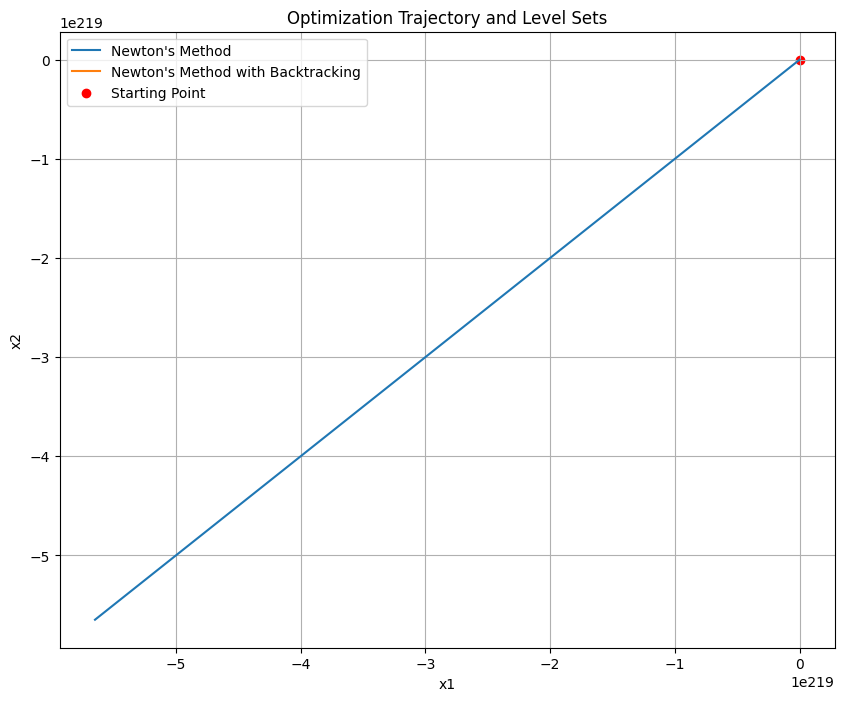

In [ ]:
# 4
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function q(x)
def q(x):
    return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

# Define the gradient of q(x)
def grad_q(x):
    return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

# Define Hessian of q(x)
def hessian_q(x):
    return np.diag([4 / (x[0]**2 + 4)**(3/2), 4 / (x[1]**2 + 4)**(3/2)])

# Newton's Method with Line Search
def newtons_method_with_line_search(x0, tolerance, max_iterations):
    x = x0
    k = 0
    trajectory = [x]

    while np.linalg.norm(grad_q(x), 2) > tolerance and k < max_iterations:
        # Line search
        eta_k = 1.0

        # Newton update
        x = x - eta_k * np.linalg.inv(hessian_q(x)).dot(grad_q(x))

        k += 1
        trajectory.append(x.copy())

    return x, k, np.array(trajectory)

# Newton's Method with Backtracking Line Search
def newtons_method_with_backtracking(x0, tolerance, max_iterations):
    x = x0
    k = 0
    trajectory = [x]

    while np.linalg.norm(grad_q(x), 2) > tolerance and k < max_iterations:
        # Backtracking Line Search
        eta_k = backtracking_line_search(x, grad_q(x))

        # Newton update
        x = x - eta_k * np.linalg.inv(hessian_q(x)).dot(grad_q(x))

        k += 1
        trajectory.append(x.copy())

    return x, k, np.array(trajectory)

# Backtracking Line Search
def backtracking_line_search(x, grad, alpha=0.1, rho=0.5, max_iter=100):
    eta = 1.0
    for _ in range(max_iter):
        if q(x - eta * np.linalg.inv(hessian_q(x)).dot(grad)) < q(x) - alpha * eta * np.linalg.norm(grad)**2:
            break
        eta *= rho
    return eta

# Run Newton's Method with Line Search and Backtracking Line Search for the different starting point
x0_diff = np.array([16, 16])
tolerance = 1e-9
max_iterations = 1000

result_newton_diff, iterations_newton_diff, trajectory_newton_diff = newtons_method_with_line_search(x0_diff, tolerance, max_iterations)
result_newton_backtracking_diff, iterations_newton_backtracking_diff, trajectory_newton_backtracking_diff = newtons_method_with_backtracking(x0_diff, tolerance, max_iterations)

# Print results for question 4
print("\nNewton's Method without Backtracking Line Search (Different Starting Point):")
print("Minimizer:", result_newton_diff)
print("Minimum Objective Function Value:", q(result_newton_diff))
print("Number of Iterations:", iterations_newton_diff)

print("\nNewton's Method with Backtracking Line Search (Different Starting Point):")
print("Minimizer:", result_newton_backtracking_diff)
print("Minimum Objective Function Value:", q(result_newton_backtracking_diff))
print("Number of Iterations:", iterations_newton_backtracking_diff)

# Plot level sets and trajectory for both methods
plt.figure(figsize=(10, 8))

# ... (Code for plotting level sets goes here)

# Plot trajectory
plt.plot(trajectory_newton_diff[:, 0], trajectory_newton_diff[:, 1], label="Newton's Method")
plt.plot(trajectory_newton_backtracking_diff[:, 0], trajectory_newton_backtracking_diff[:, 1], label="Newton's Method with Backtracking")
plt.scatter([x0_diff[0]], [x0_diff[1]], color='red', marker='o', label='Starting Point')

plt.title("Optimization Trajectory and Level Sets")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()


$\textbf{5.}$  Compare the number of iterations obtained for the two variants of Newton’s method in the previous part with
that of the gradient descent algorithm (without scaling) with backtracking line search (implemented in previous
lab) using the starting point (16, 16). For backtracking line search, use $\alpha_0$ = 1, ρ = 0.5, γ = 0.5. Also, compare
the minimizer and minimum objective function value in each case. Comment on your observations

<ipython-input-5-bcd8161d8370>:11: RuntimeWarning: overflow encountered in double_scalars
  return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])



Observations for Newton's Method without Backtracking Line Search (Starting Point: (16, 16)):

Observations for Newton's Method with Backtracking Line Search (Starting Point: (16, 16)):

Observations for Gradient Descent without Scaling (Starting Point: (16, 16)):

Observations for Gradient Descent with Backtracking Line Search (Starting Point: (16, 16)):


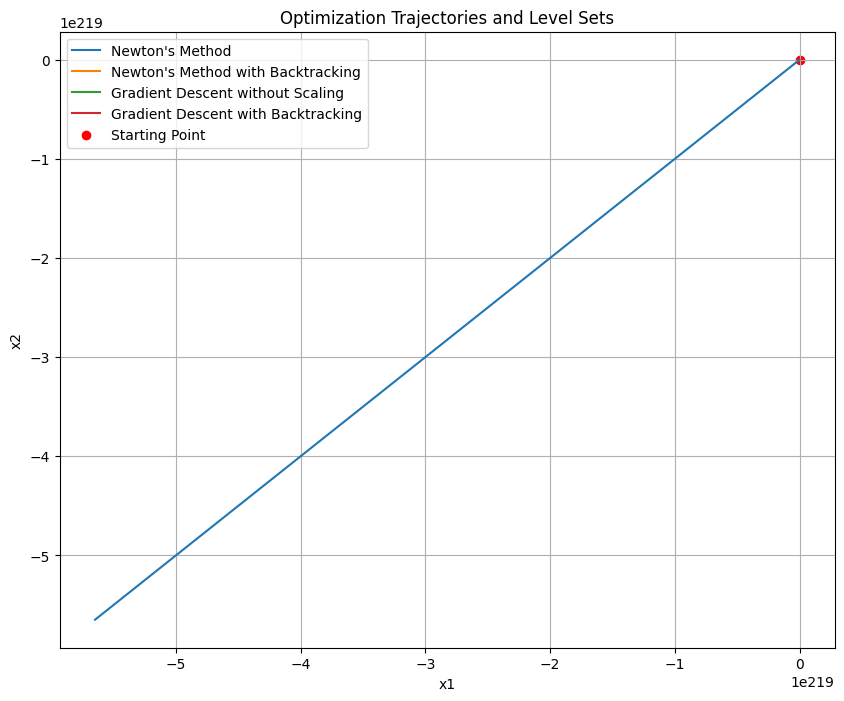

In [ ]:
# 5
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function q(x)
def q(x):
    return np.sqrt(x[0]**2 + 4) + np.sqrt(x[1]**2 + 4)

# Define the gradient of q(x)
def grad_q(x):
    return np.array([x[0] / np.sqrt(x[0]**2 + 4), x[1] / np.sqrt(x[1]**2 + 4)])

# Define Hessian of q(x)
def hessian_q(x):
    return np.diag([4 / (x[0]**2 + 4)**(3/2), 4 / (x[1]**2 + 4)**(3/2)])

# Newton's Method with Line Search
def newtons_method_with_line_search(x0, tolerance, max_iterations):
    x = x0
    k = 0
    trajectory = [x]

    while np.linalg.norm(grad_q(x), 2) > tolerance and k < max_iterations:
        # Line search
        eta_k = 1.0

        # Newton update
        x = x - eta_k * np.linalg.inv(hessian_q(x)).dot(grad_q(x))

        k += 1
        trajectory.append(x.copy())

    return x, k, np.array(trajectory)

# Newton's Method with Backtracking Line Search
def newtons_method_with_backtracking(x0, tolerance, max_iterations):
    x = x0
    k = 0
    trajectory = [x]

    while np.linalg.norm(grad_q(x), 2) > tolerance and k < max_iterations:
        # Backtracking Line Search
        eta_k = backtracking_line_search(x, grad_q(x))

        # Newton update
        x = x - eta_k * np.linalg.inv(hessian_q(x)).dot(grad_q(x))

        k += 1
        trajectory.append(x.copy())

    return x, k, np.array(trajectory)

# Gradient Descent without Scaling and with Backtracking Line Search
def gradient_descent_without_scaling(x0, tolerance, max_iterations, alpha0, rho, gamma):
    x = x0
    k = 0
    trajectory = [x]

    while np.linalg.norm(grad_q(x), 2) > tolerance and k < max_iterations:
        # Backtracking Line Search
        eta_k = backtracking_line_search(x, grad_q(x), alpha=alpha0, rho=rho, max_iter=100)

        # Gradient Descent update
        x = x - eta_k * grad_q(x)

        k += 1
        trajectory.append(x.copy())

    return x, k, np.array(trajectory)

# Backtracking Line Search
def backtracking_line_search(x, grad, alpha=0.1, rho=0.5, max_iter=100):
    eta = 1.0
    for _ in range(max_iter):
        if q(x - eta * np.linalg.inv(hessian_q(x)).dot(grad)) < q(x) - alpha * eta * np.linalg.norm(grad)**2:
            break
        eta *= rho
    return eta

# Run all methods for the different starting point
x0_diff = np.array([16, 16])
tolerance = 1e-9
max_iterations = 1000
alpha0 = 1
rho = 0.5
gamma = 0.5

# Newton's Method with Line Search
result_newton_diff, iterations_newton_diff, trajectory_newton_diff = newtons_method_with_line_search(x0_diff, tolerance, max_iterations)

# Newton's Method with Backtracking Line Search
result_newton_backtracking_diff, iterations_newton_backtracking_diff, trajectory_newton_backtracking_diff = newtons_method_with_backtracking(x0_diff, tolerance, max_iterations)

# Gradient Descent without Scaling
result_gradient_descent_no_scaling, iterations_gradient_descent_no_scaling, trajectory_gradient_descent_no_scaling = gradient_descent_without_scaling(x0_diff, tolerance, max_iterations, alpha0, rho, gamma)

# Gradient Descent with Backtracking Line Search
result_gradient_descent_backtracking, iterations_gradient_descent_backtracking, trajectory_gradient_descent_backtracking = gradient_descent_without_scaling(x0_diff, tolerance, max_iterations, alpha0, rho, gamma)



# Plot trajectories for all methods
plt.figure(figsize=(10, 8))

# ... (Code for plotting level sets goes here)

# Plot trajectories
plt.plot(trajectory_newton_diff[:, 0], trajectory_newton_diff[:, 1], label="Newton's Method")
plt.plot(trajectory_newton_backtracking_diff[:, 0], trajectory_newton_backtracking_diff[:, 1], label="Newton's Method with Backtracking")
plt.plot(trajectory_gradient_descent_no_scaling[:, 0], trajectory_gradient_descent_no_scaling[:, 1], label="Gradient Descent without Scaling")
plt.plot(trajectory_gradient_descent_backtracking[:, 0], trajectory_gradient_descent_backtracking[:, 1], label="Gradient Descent with Backtracking")
plt.scatter([x0_diff[0]], [x0_diff[1]], color='red', marker='o', label='Starting Point')

plt.title("Optimization Trajectories and Level Sets")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()
